In [1]:
import os
import os
import jieba 
import numpy as np
import pandas as pd
from pyecharts.charts import Bar,Pie,Line,WordCloud,Page  #pyecharts 可视化工具
from pyecharts import options as opts
from pyecharts.globals import SymbolType
import stylecloud
from IPython.display import Image # 用于在jupyter lab中显示本地图

In [2]:
#读入数据
data_list=os.listdir('../data/sister/')
df_all=pd.DataFrame()
for i in data_list:
    if i.split('.')[-1]=='csv':
        print(i)
        df_one=pd.read_csv(f'../data/sister/{i}',engine='python',index_col=0)
        df_all=df_all.append(df_one,ignore_index=False)

乘风破浪姐姐第10集.csv
乘风破浪姐姐第11集.csv
乘风破浪姐姐第12集.csv
乘风破浪姐姐第13集.csv
乘风破浪姐姐第14集.csv
乘风破浪姐姐第15集.csv
乘风破浪姐姐第16集.csv
乘风破浪姐姐第17集.csv
乘风破浪姐姐第18集.csv
乘风破浪姐姐第19集.csv
乘风破浪姐姐第1集.csv
乘风破浪姐姐第20集.csv
乘风破浪姐姐第21集.csv
乘风破浪姐姐第22集.csv
乘风破浪姐姐第23集.csv
乘风破浪姐姐第24集.csv
乘风破浪姐姐第25集.csv
乘风破浪姐姐第26集.csv
乘风破浪姐姐第27集.csv
乘风破浪姐姐第28集.csv
乘风破浪姐姐第29集.csv
乘风破浪姐姐第2集.csv
乘风破浪姐姐第30集.csv
乘风破浪姐姐第31集.csv
乘风破浪姐姐第32集.csv
乘风破浪姐姐第3集.csv
乘风破浪姐姐第4集.csv
乘风破浪姐姐第5集.csv
乘风破浪姐姐第6集.csv
乘风破浪姐姐第7集.csv
乘风破浪姐姐第8集.csv
乘风破浪姐姐第9集.csv


In [3]:
print(df_all.shape)

(839952, 7)


In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839952 entries, 0 to 21723
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   episodes    839952 non-null  int64  
 1   comment_id  839952 non-null  float64
 2   oper_name   38554 non-null   object 
 3   vip_degree  839952 non-null  int64  
 4   content     839952 non-null  object 
 5   time_point  839952 non-null  int64  
 6   up_count    765484 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 51.3+ MB


In [5]:
df_all.head()

,episodes,comment_id,oper_name,vip_degree,content,time_point,up_count
0,10,6.850000e+18,说唱bro,3,李斯丹妮冲啊啊啊啊啊啊啊啊啊！！！！！！！！！！！,877,12.0
1,10,6.850000e+18,NaN,0,带沙袋的事情我觉得蓝盈莹才委屈 上一期的组也有啊 大家都很积极的带上了,0,9.0
2,10,6.850000e+18,浪花崽,3,唱跳全能郑希怡，七六五四三二一,0,13.0
3,10,6.850000e+18,NaN,0,不是啊 吴昕主动站出来让人家选的啊,0,1.0
4,10,6.850000e+18,NaN,0,都是奔着赢去的，所以蓝盈盈也没什么错,0,9.0


In [6]:
#提取数据
pattern=r'(阿朵\s*|郑希怡\s*|宁静\s*|陈松伶\s*|钟丽缇\s*|伊能静\s*|海陆\s*|金晨\s*|蓝盈莹\s*|王丽坤\s*|万茜\s*|张萌\s*|金莎\s*|刘芸\s*|沈梦辰\s*|吴昕\s*|郁可唯\s*|朱婧汐\s*|丁当\s*|黄龄\s*|孟佳\s*|王霏霏\s*|许飞\s*|袁咏琳\s*|张雨绮\s*|黄圣依\s*|张含韵\s*|王智\s*|白冰\s*|李斯丹妮\s*|).*'

In [7]:
df_all['dammu_role']=df_all['content'].str.extract(pattern)[0].str.strip()
df_all.head()

,episodes,comment_id,oper_name,vip_degree,content,time_point,up_count,dammu_role
0,10,6.850000e+18,说唱bro,3,李斯丹妮冲啊啊啊啊啊啊啊啊啊！！！！！！！！！！！,877,12.0,李斯丹妮
1,10,6.850000e+18,NaN,0,带沙袋的事情我觉得蓝盈莹才委屈 上一期的组也有啊 大家都很积极的带上了,0,9.0,
2,10,6.850000e+18,浪花崽,3,唱跳全能郑希怡，七六五四三二一,0,13.0,
3,10,6.850000e+18,NaN,0,不是啊 吴昕主动站出来让人家选的啊,0,1.0,
4,10,6.850000e+18,NaN,0,都是奔着赢去的，所以蓝盈盈也没什么错,0,9.0,


In [8]:
def transform_name(x):
    if x in ['阿朵','郑希怡','宁静','陈松伶','钟丽缇','伊能静','海陆','金晨','蓝盈莹','王丽坤','万茜','张萌','金莎','刘芸','沈梦辰','吴昕','郁可唯','朱婧汐','丁当','黄龄','孟佳','王霏霏','许飞','袁咏琳','张雨绮','黄圣依','张含韵','王智','白冰','李斯丹妮']:
        return 'VIP用户'
    elif x=='NaN':
        return '未知用户'
    else:
        return '普通用户'
    
df_all['danmu_level'] = df_all['dammu_role'].apply(transform_name)
df_all.head() 

,episodes,comment_id,oper_name,vip_degree,content,time_point,up_count,dammu_role,danmu_level
0,10,6.850000e+18,说唱bro,3,李斯丹妮冲啊啊啊啊啊啊啊啊啊！！！！！！！！！！！,877,12.0,李斯丹妮,VIP用户
1,10,6.850000e+18,NaN,0,带沙袋的事情我觉得蓝盈莹才委屈 上一期的组也有啊 大家都很积极的带上了,0,9.0,,普通用户
2,10,6.850000e+18,浪花崽,3,唱跳全能郑希怡，七六五四三二一,0,13.0,,普通用户
3,10,6.850000e+18,NaN,0,不是啊 吴昕主动站出来让人家选的啊,0,1.0,,普通用户
4,10,6.850000e+18,NaN,0,都是奔着赢去的，所以蓝盈盈也没什么错,0,9.0,,普通用户


In [9]:
#等级分布
level_num = df_all['danmu_level'].value_counts()
level_num 

普通用户     681404
VIP用户    158548
Name: danmu_level, dtype: int64

In [10]:
data_pair =  [list(z) for z in zip(level_num.index.tolist(), level_num.values.tolist())]

# 绘制饼图
pie1 = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))
pie1.add('', data_pair, radius=['35%', '60%'])
pie1.set_global_opts(title_opts=opts.TitleOpts(title='弹幕发送人群等级分布'), 
                     legend_opts=opts.LegendOpts(orient='vertical', pos_top='15%', pos_left='2%'))
pie1.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%"))
pie1.set_colors(['#6FB27C', '#FFAF34'])
pie1.render() 

D:\anaconda\envs\pytorch\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'D:\\BaiduNetdiskDownload\\三十而已数据+代码\\code\\render.html'

In [11]:
#VIP用户最喜欢使用的弹幕角色
role_num = df_all['dammu_role'].value_counts()
role_num

        681404
万茜       14036
孟佳       12747
金晨       11568
郁可唯       8382
宁静        8251
郑希怡       7704
张雨绮       7422
白冰        7205
李斯丹妮      7127
张含韵       6308
吴昕        6216
阿朵        6033
伊能静       5636
蓝盈莹       4954
黄龄        4615
王霏霏       4351
黄圣依       3978
张萌        3638
丁当        3447
袁咏琳       3157
金莎        3122
王丽坤       2917
朱婧汐       2752
海陆        2689
王智        2483
沈梦辰       2387
许飞        2142
钟丽缇       2000
刘芸         692
陈松伶        589
Name: dammu_role, dtype: int64

In [12]:
bar1 = Bar(init_opts=opts.InitOpts(width='1350px', height='750px'))
bar1.add_xaxis(role_num.index.tolist())
bar1.add_yaxis("", role_num.values.tolist(), category_gap='5%')
bar1.set_global_opts(title_opts=opts.TitleOpts(title="VIP用户最喜欢使用的弹幕角色"), 
                     visualmap_opts=opts.VisualMapOpts(max_=21027),
                    )
bar1.render()

D:\anaconda\envs\pytorch\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'D:\\BaiduNetdiskDownload\\三十而已数据+代码\\code\\render.html'

In [13]:
word_num = df_all.content.apply(lambda x:len(x)) 
word_num.describe() 

count    839952.000000
mean         11.490354
std           6.864815
min           1.000000
25%           7.000000
50%          10.000000
75%          15.000000
max          64.000000
Name: content, dtype: float64

In [14]:
word_num = df_all.content.apply(lambda x:len(x)) 

# 分箱
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65]  
word_num_cut = pd.cut(word_num, bins, right=False).value_counts()
word_num_cut = word_num_cut.sort_index()
word_num_cut

[0, 5)       78334
[5, 10)     323833
[10, 15)    223096
[15, 20)    113957
[20, 25)     53719
[25, 30)     25411
[30, 35)     11932
[35, 40)      6949
[40, 45)      2487
[45, 50)       115
[50, 55)        61
[55, 60)        21
[60, 65)        37
Name: content, dtype: int64

In [15]:
# 柱形图
bar2 = Bar(init_opts=opts.InitOpts(width='1350px', height='750px'))
bar2.add_xaxis(word_num_cut.index.astype('str').tolist())
bar2.add_yaxis("", word_num_cut.values.tolist(), category_gap='4%')
bar2.set_global_opts(title_opts=opts.TitleOpts(title="弹幕发送字数分布"), 
                     visualmap_opts=opts.VisualMapOpts(max_=72694),
                    )
bar2.render() 

D:\anaconda\envs\pytorch\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'D:\\BaiduNetdiskDownload\\三十而已数据+代码\\code\\render.html'

In [16]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open(r"D:\BaiduNetdiskDownload\三十而已数据+代码\data\chineseStopWords.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['阿朵','郑希怡','宁静','陈松伶','钟丽缇','伊能静','海陆','金晨',
                '蓝盈莹','王丽坤','万茜','张萌','金莎','刘芸','沈梦辰','吴昕','郁可唯',
                '朱婧汐','丁当','黄龄','孟佳','王霏霏','许飞','袁咏琳','张雨绮','黄圣依','张含韵','王智','白冰','李斯丹妮']
    
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = ['真的', '这部', '这是', '一种', '那种',
                    '哈哈哈', '哈哈哈哈', '啊啊啊']    
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected


In [17]:
df_all['dammu_role'] = df_all.dammu_role.str.strip() 

In [18]:
print(role_num)
len(role_num)

        681404
万茜       14036
孟佳       12747
金晨       11568
郁可唯       8382
宁静        8251
郑希怡       7704
张雨绮       7422
白冰        7205
李斯丹妮      7127
张含韵       6308
吴昕        6216
阿朵        6033
伊能静       5636
蓝盈莹       4954
黄龄        4615
王霏霏       4351
黄圣依       3978
张萌        3638
丁当        3447
袁咏琳       3157
金莎        3122
王丽坤       2917
朱婧汐       2752
海陆        2689
王智        2483
沈梦辰       2387
许飞        2142
钟丽缇       2000
刘芸         692
陈松伶        589
Name: dammu_role, dtype: int64


31

In [23]:
content_series1 = df_all[df_all.content.str.contains('万茜')]['content']
text1 = get_cut_words(content_series1) 
text1[:5] 

['万茜', '我来', '万茜', '冲冲', '百万']

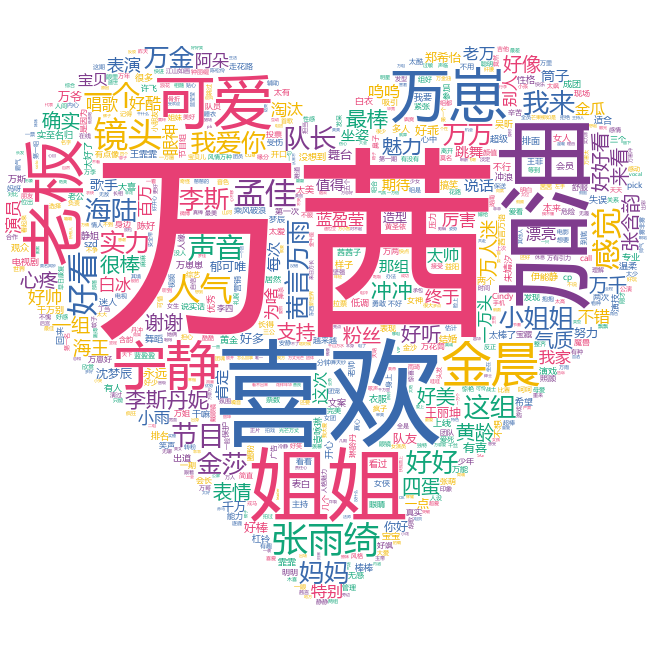

In [28]:
# 绘制词云图
stylecloud.gen_stylecloud(text=' '.join(text1), max_words=1000,
                          collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-heart',
                          size=653,
                          output_name='./html/弹幕角万茜-词云图.png')
Image(filename='./html/弹幕角色王漫妮-词云图.png') 

In [31]:
content_series1 = df_all[df_all.content.str.contains('张雨绮|小雨')]['content']
text2 = get_cut_words(content_series1) 
text2[:5] 

['小雨', '我来', '小雨', '我来', '张雨绮']

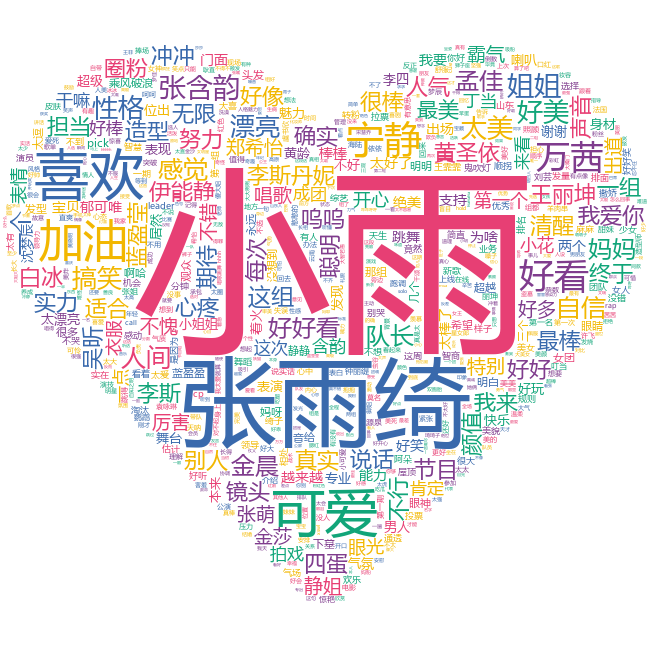

In [33]:
# 绘制词云图
stylecloud.gen_stylecloud(text=' '.join(text2), max_words=1000,
                          collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-heart',
                          size=653,
                          output_name='./html/弹幕张雨绮-词云图.png')
Image(filename='./html/弹幕张雨绮-词云图.png')  

In [34]:
content_series1 = df_all[df_all.content.str.contains('金晨')]['content']
text3 = get_cut_words(content_series1) 
text3[:5] 

['金晨', '我来', '金晨', '加油', '晨晨子']

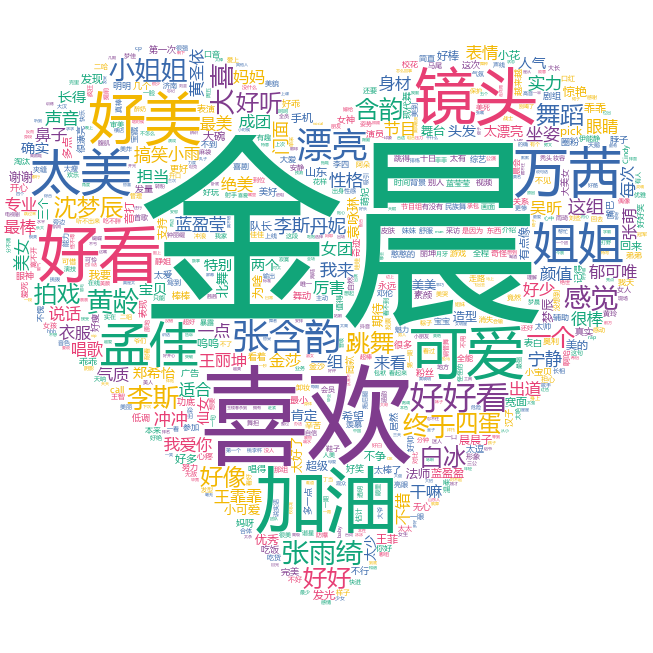

In [36]:
# 绘制词云图
stylecloud.gen_stylecloud(text=' '.join(text3), max_words=1000,
                          collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-heart',
                          size=653,
                          output_name='./html/弹幕金晨-词云图.png')
Image(filename='./html/弹幕金晨-词云图.png') 

In [39]:
# 模式
sis=['阿朵','郑希怡','宁静','陈松伶','钟丽缇','伊能静','海陆','金晨',
                '蓝盈莹','王丽坤','万茜','张萌','金莎','刘芸','沈梦辰','吴昕','郁可唯',
                '朱婧汐','丁当','黄龄','孟佳','王霏霏','许飞','袁咏琳','张雨绮','黄圣依','张含韵','王智','白冰','李斯丹妮']
 
pat={i:j for i,j in enumerate(sis)}

In [40]:
pat[1]

'郑希怡'

In [41]:
pat[1]

'郑希怡'

In [47]:
name=[]
for i in pat.keys():
    name.append(pat[i])
    

In [48]:
name

['阿朵',
 '郑希怡',
 '宁静',
 '陈松伶',
 '钟丽缇',
 '伊能静',
 '海陆',
 '金晨',
 '蓝盈莹',
 '王丽坤',
 '万茜',
 '张萌',
 '金莎',
 '刘芸',
 '沈梦辰',
 '吴昕',
 '郁可唯',
 '朱婧汐',
 '丁当',
 '黄龄',
 '孟佳',
 '王霏霏',
 '许飞',
 '袁咏琳',
 '张雨绮',
 '黄圣依',
 '张含韵',
 '王智',
 '白冰',
 '李斯丹妮']

In [50]:
number=[]
for i in name:
    number.append(df_all.content.str.contains(i).sum())

In [51]:
df_num = pd.DataFrame({
    'name': name,
    'number': number
})
df_num = df_num.sort_values('number', ascending=False)
df_num

,name,number
10,万茜,24089
20,孟佳,23766
7,金晨,17476
2,宁静,17024
24,张雨绮,13631
16,郁可唯,12388
1,郑希怡,11547
28,白冰,11355
29,李斯丹妮,10864
15,吴昕,10680


In [63]:
# 产生数据
x_data = df_num['name'].values.tolist()
y_data = df_num['number'].values.tolist()

# 条形图
bar1 = Bar(init_opts=opts.InitOpts(width='1350px', height='750px'))
print(x_data)
bar1.add_xaxis(x_data)
bar1.add_yaxis('', y_data)
bar1.set_global_opts(title_opts=opts.TitleOpts(title='姐姐提及次数'), 
                     visualmap_opts=opts.VisualMapOpts(max_=103))

bar1.render() 

D:\anaconda\envs\pytorch\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


['万茜', '孟佳', '金晨', '宁静', '张雨绮', '郁可唯', '郑希怡', '白冰', '李斯丹妮', '吴昕', '张含韵', '伊能静', '阿朵', '蓝盈莹', '黄龄', '王霏霏', '黄圣依', '丁当', '张萌', '袁咏琳', '金莎', '王丽坤', '沈梦辰', '海陆', '朱婧汐', '王智', '许飞', '钟丽缇', '刘芸', '陈松伶']


'D:\\BaiduNetdiskDownload\\三十而已数据+代码\\code\\render.html'

In [64]:
page1 = Page()
page1.add(pie1, bar1, bar2)
page1.render('./html/姐姐弹幕数据分析.html')

'D:\\BaiduNetdiskDownload\\三十而已数据+代码\\code\\html\\姐姐弹幕数据分析.html'